# Searching for Spitzer Enhanced Imaging Products

This notebook tutorial demonstrates the process of querying IRSA's Simple Image Access v2 (SIAv2) service for the Spitzer Enhanced Imaging Products (SEIP), making a cutout image (thumbnail), and displaying the cutout.

***

## Learning Goals

By the end of this tutorial, you will:

* Learn how to search the NASA Astronomical Virtual Observatory Directory web portal for a service that provides access to IRSA's Spitzer Enhanced Imaging Products (SEIP) images.
* Use the Python pyvo package to identify which of IRSA's SEIP images cover a specified coordinate.
* Download one of the identified images.
* Create and display a cutout of the downloaded image.

## Introduction

The Spitzer Enhanced Imaging Products (SEIP) include Super Mosaics combining data from multiple programs if appropriate, and a high-reliability Source List of compact objects. The SEIP include data from the four channels of IRAC (3.6, 4.5, 5.8, 8 microns) and the 24 micron channel of MIPS. More information about the SEIP can be found at:

https://irsa.ipac.caltech.edu/data/SPITZER/Enhanced/SEIP/

The [NASA/IPAC Infrared Science Archive (IRSA)](https://irsa.ipac.caltech.edu) at Caltech is the archive for SEIP images and catalogs. The SEIP images that are the subject of this tutorial are made accessible via the [International Virtual Observatory Alliance (IVOA)](https://ivoa.net) [Simple Image Access (SIA)](https://wiki.ivoa.net/internal/IVOA/SiaInterface/SIA-V2-Analysis.pdf) protocol. IRSA's SEIP SIA service is registered in the NASA Astronomical Virtual Observatory (NAVO) [Directory](https://vao.stsci.edu). Based on the registered information, the Python package [pyvo](https://pyvo.readthedocs.io) can be used to query the SEIP SIA service for a list of images that meet specified criteria, and standard Python libraries can be used to download and manipulate the images.
Other datasets at IRSA are available through other SIA services:

https://irsa.ipac.caltech.edu/docs/program_interface/api_images.html

## Imports

- *pyvo* for querying IRSA's SEIP SIA service
- *astropy.coordinates* for defining coordinates
- *astropy.nddata* for creating an image cutout
- *astropy.wcs* for interpreting the World Coordinate System header keywords of a fits file
- *astropy.units* for attaching units to numbers passed to the SIA service
- *matplotlib.pyplot* for plotting
- *astropy.utils.data* for downloading files
- *astropy.io* to manipulate FITS files

In [1]:
# Uncomment the next line to install dependencies if needed.
# !pip install matplotlib astropy pyvo

In [2]:
import pyvo as vo
from astropy.coordinates import SkyCoord
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.utils.data import download_file
from astropy.io import fits

## Section 1 - Setup

Set images to display in the notebook

In [3]:
%matplotlib inline

Define coordinates of a bright star

In [4]:
ra = 314.30417
dec = 77.595559
pos = SkyCoord(ra=ra, dec=dec, unit='deg')

## Section 2 - Lookup and define a service for SEIP images

Start at STScI VAO Registry at https://vao.stsci.edu/keyword-search/

Search on "seip"

Locate the COLLECTION=spitzer_seip from the SIA2 URL https://irsa.ipac.caltech.edu/SIA?COLLECTION=spitzer_seip&

To work with PyVO, define this SIAv2 service and use the collection argument separately

In [5]:
seip_service2= vo.dal.sia2.SIA2Service('https://irsa.ipac.caltech.edu/SIA')

## Section 3 - Search the service

Search for images covering within 10 arcseconds of the star

In [6]:
im_table = seip_service2.search(pos=(pos.ra.deg, pos.dec.deg, 10*u.arcsec),
                                collection='spitzer_seip')

Display the table of images that is returned

In [7]:
im_table.to_table()

s_ra,s_dec,facility_name,instrument_name,dataproduct_subtype,calib_level,dataproduct_type,energy_bandpassname,energy_emband,obs_id,s_resolution,em_min,em_max,em_res_power,proposal_title,access_url,access_format,access_estsize,t_exptime,s_region,obs_collection,obs_intent,algorithm_name,facility_keywords,instrument_keywords,environment_photometric,proposal_id,proposal_pi,proposal_project,target_name,target_type,target_standard,target_moving,target_keywords,obs_release_date,s_xel1,s_xel2,s_pixel_scale,position_timedependent,t_min,t_max,t_resolution,t_xel,obs_publisher_did,s_fov,em_xel,pol_states,pol_xel,cloud_access,o_ucd,upload_row_id
deg,deg,,,,,,,,,arcsec,m,m,,,,,kbyte,s,deg,,,,,,,,,,,,,,,,,,arcsec,,d,d,s,,,deg,,,,,,
float64,float64,object,object,object,int16,object,object,object,object,float64,float64,float64,float64,object,object,object,int64,float64,object,object,object,object,object,object,bool,object,object,object,object,object,bool,bool,object,object,int64,int64,float64,bool,float64,float64,float64,int64,object,float64,int64,object,int64,object,object,int64
314.7482131,77.4212892,Spitzer Space Telescope,IRAC,weight,3,image,IRAC1,Infrared,40019821.40019821-9.IRAC,1.66,3.17e-06,3.92e-06,4.8,Spitzer Enhanced Imaging Products,https://irsa.ipac.caltech.edu/data/SPITZER/Enhanced/SEIP/images/4/0019/40019821/9/40019821-9/40019821.40019821-9-short.IRAC.1.cov.fits,image/fits,64394,--,POLYGON ICRS 316.0670347 77.0402173 316.1473632 77.7956756 313.3483063 77.7956771 313.4286176 77.0402187 316.0670347 77.0402173,spitzer_seip,science,mosaic,,,--,,,Spitzer,,field,False,False,,2013-12-19 00:00:00,3550,4534,0.600012,False,--,--,--,--,ivo://irsa.ipac/spitzer_seip/40019821.40019821-9.IRAC,0.6686708174189524,--,,--,"{""aws"": {""bucket_name"": ""nasa-irsa-spitzer"", ""key"":""spitzer/seip/seip_science/images/4/0019/40019821/9/40019821-9/40019821.40019821-9-short.IRAC.1.cov.fits"", ""region"": ""us-west-2""}}",,1
314.7482131,77.4212892,Spitzer Space Telescope,IRAC,noise,3,image,IRAC1,Infrared,40019821.40019821-9.IRAC,1.66,3.17e-06,3.92e-06,4.8,Spitzer Enhanced Imaging Products,https://irsa.ipac.caltech.edu/data/SPITZER/Enhanced/SEIP/images/4/0019/40019821/9/40019821-9/40019821.40019821-9-short.IRAC.1.median_mosaic_unc.fits,image/fits,64394,--,POLYGON ICRS 316.0670347 77.0402173 316.1473632 77.7956756 313.3483063 77.7956771 313.4286176 77.0402187 316.0670347 77.0402173,spitzer_seip,science,mosaic,,,--,,,Spitzer,,field,False,False,,2013-12-19 00:00:00,3550,4534,0.600012,False,--,--,--,--,ivo://irsa.ipac/spitzer_seip/40019821.40019821-9.IRAC,0.6686708174189524,--,,--,"{""aws"": {""bucket_name"": ""nasa-irsa-spitzer"", ""key"":""spitzer/seip/seip_science/images/4/0019/40019821/9/40019821-9/40019821.40019821-9-short.IRAC.1.median_mosaic_unc.fits"", ""region"": ""us-west-2""}}",,1
314.7482131,77.4212892,Spitzer Space Telescope,IRAC,science,3,image,IRAC1,Infrared,40019821.40019821-9.IRAC,1.66,3.17e-06,3.92e-06,4.8,Spitzer Enhanced Imaging Products,https://irsa.ipac.caltech.edu/data/SPITZER/Enhanced/SEIP/images/4/0019/40019821/9/40019821-9/40019821.40019821-9-short.IRAC.1.median_mosaic.fits,image/fits,64394,--,POLYGON ICRS 316.0670347 77.0402173 316.1473632 77.7956756 313.3483063 77.7956771 313.4286176 77.0402187 316.0670347 77.0402173,spitzer_seip,science,mosaic,,,--,,,Spitzer,,field,False,False,,2013-12-19 00:00:00,3550,4534,0.600012,False,--,--,--,--,ivo://irsa.ipac/spitzer_seip/40019821.40019821-9.IRAC,0.6686708174189524,--,,--,"{""aws"": {""bucket_name"": ""nasa-irsa-spitzer"", ""key"":""spitzer/seip/seip_science/images/4/0019/40019821/9/40019821-9/40019821.40019821-9-short.IRAC.1.median_mosaic.fits"", ""region"": ""us-west-2""}}",,1
314.7482131,77.4212892,Spitzer Space Telescope,IRAC,noise,3,image,IRAC1,Infrared,40019821.40019821-9.IRAC,1.66,3.17e-06,3.92e-06,4.8,Spitzer Enhanced Imaging Products,https://irsa.ipac.caltech.edu/data/SPITZER/Enhanced/SEIP/images/4/0019/40019821/9/40019821-9/40019821.40019821-9-short.IRAC.1.std.fits,image/fits,643

## Section 4 - Locate and download an image of interest

Let's search the image results for a short-exposure IRAC Ch3 mosaic.

In [8]:
for i in range(len(im_table)):
    if im_table[i].getdataurl().endswith('short.IRAC.3.mosaic.fits'):
        break
print(im_table[i].getdataurl())

https://irsa.ipac.caltech.edu/data/SPITZER/Enhanced/SEIP/images/4/0019/40019821/9/40019821-9/40019821.40019821-9-short.IRAC.3.mosaic.fits


Download the image and open it in Astropy

In [9]:
fname = download_file(im_table[i].getdataurl(), cache=True)
image1 = fits.open(fname)

## Section 5 - Extract a cutout and plot it

In [10]:
wcs = WCS(image1[0].header)

In [11]:
cutout = Cutout2D(image1[0].data, pos, (60, 60), wcs=wcs)
wcs = cutout.wcs

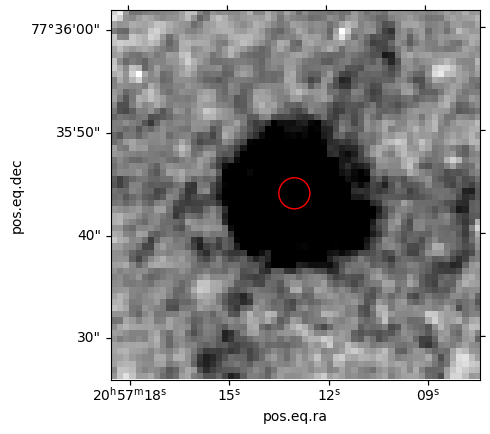

In [12]:
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection=wcs)
ax.imshow(cutout.data, cmap='gray_r', origin='lower', vmax = 10)
ax.scatter(ra, dec, transform=ax.get_transform('fk5'), s=500, edgecolor='red', facecolor='none')

## Exercise

Search the SEIP Source List using IRSA [Gator service](https://irsa.ipac.caltech.edu/cgi-bin/Gator/nph-scan?projshort=SPITZER), find an object of interest and repeat the steps above to extract cutouts in all four IRAC bands.

***

## About this notebook

**Author:** David Shupe, IRSA Scientist, and the IRSA Science Team

**Updated:** 2022-02-14

**Contact:** [the IRSA Helpdesk](https://irsa.ipac.caltech.edu/docs/help_desk.html) with questions or reporting problems.

## Citations

If you use `astropy` for published research, please cite the authors. Follow these links for more information about citing `astropy`:

* [Citing `astropy`](https://www.astropy.org/acknowledging.html)

If you use SEIP data in published research,  please cite the dataset Digital Object Identifier (DOI): [10.26131/IRSA433](https://www.ipac.caltech.edu/doi/irsa/10.26131/IRSA433).